<a href="https://colab.research.google.com/github/Irfan270791/CAPSTONE-PROJECT---IM-HOTEL-BOOKING-ANALYSIS/blob/main/IM_HOTEL_BOOKING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** - Irfan Momin
##### **Team Member 2 -** - Sushil Ghodwinde

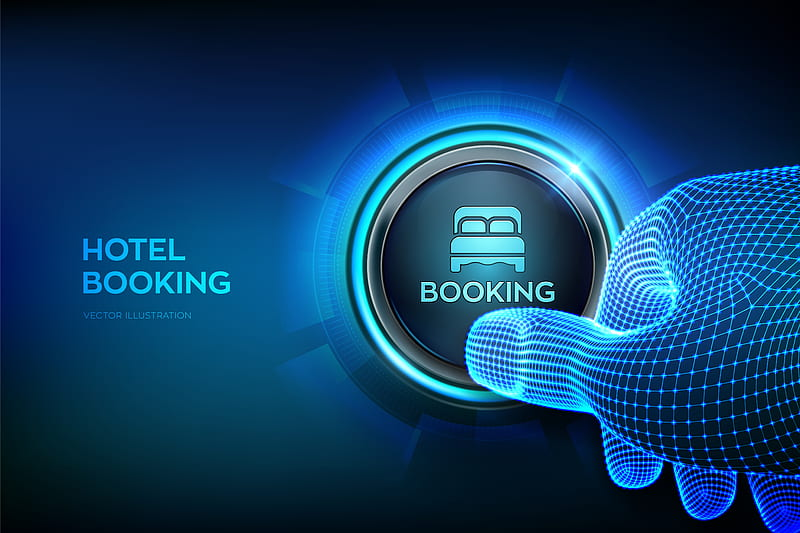


# **Project Summary -**

The project aims to conduct an exploratory data analysis (EDA) on a dataset of hotel bookings to gain insights on booking patterns and customer behaviour.The analysis will focus on identifying patterns in bookings and cancellations, customer demographics and preferences and effectiveness of different distribution channels.

# **GitHub Link -**

https://github.com/Irfan270791/CAPSTONE-PROJECT---IM-HOTEL-BOOKING-ANALYSIS

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room? Or the optimal lenght of stay in order to get the best daily rate? what if you want to predict whether or not a hotel was likely to receive a disproporationately high number of special requests? This hotel booking dataset can help you explore those questions. This dataset contains booking information for a city hotel & resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children and babies and the number of available parking spaces, among other things.All personal identifying information has been removed from the dataset. Explore and Analyse the data to discover important factors that govern the bookings.

#### **Define Your Business Objective?**

The business objectives that this project tries to achieve are -

* To Gain a comprehensive uderstanding of booking patterns and customer behavior.
* Understand which amenities and services are most popular among guests.
* Determine key drivers of occupancy,revenue and customer satisfaction.
* From strategies for increasing occupancy, revenue and customer satisfaction.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset.
dataset = pd.read_csv('/content/drive/MyDrive/HOTEL BOOKING ANALYSIS EDA./Hotel Bookings.csv')

### Dataset First View

In [ ]:
# Dataset First Look - top 5 rows.
dataset.head()

In [ ]:
# Dataset bottom 5 rows.
dataset.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'The Number of Rows are {dataset.shape[0]} \n The Number of Columns are {dataset.shape[1]}')

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dupalicate_value = len(dataset[dataset.duplicated()])
print("The number of Dupalicated values in datasets are =", dupalicate_value)

In [ ]:
# The percentage of duplicate value in dataset.
len(dataset[dataset.duplicated()])*100/dataset.shape[0]

In [ ]:
# Dropping Duplicate values.
df = dataset.drop_duplicates().reset_index(drop = True)
print('Shape of the dataset after dropping dupalicate values :',df.shape)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
nan_count = df.isna().sum().sort_values(ascending = False)

# Print only columns with non-zero number of missing values.
nan_count = nan_count[nan_count>0]
print(nan_count)

In [ ]:
# Visualizing the missing values
# Finding the precentage of missing values
df_nan_percentage = (nan_count*100/len(df)).round(3)
print(df_nan_percentage)

plt.figure(figsize=(8,4))
df_nan_percentage.plot.bar()
for idx,y in enumerate(df_nan_percentage):  # Adding text on top of the bars.
  plt.text(idx,y+1,y, ha='center')


### What did you know about your dataset?

The dataset contains the booking information for a city hotel & a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, childrens & Babies and the number of available parking spaces, among other things.

* The most data is missing around 94% from the 'company' Columns and also some data is missing from three other columns as well.
* We can drop the 'Company' and 'agent' columns.
* We can drop the missing rows from 'Country' and 'Children' Columns.








In [ ]:
# Droping the missing values.
df_1 = df.drop(['company','agent'], axis=1).dropna().reset_index(drop = True)

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_1.columns

In [ ]:
# Dataset Describe
df_1.describe()


* Cancellation rate: The is_canceled feature has a mean of 0.27,which suggests that approximately 27% of booking are cancelled.This could be an important metric, as it could indicate issues with overbooking or customer dissatisfaction .
* Lead Time: The mean lead time of 80 days suggests that on average, customers book their stay about 80 days in advance.This could be useful for the hotel to know when planning for staffing and room inventory.
* Room occupancy: The mean number of the adults per booking is 1.87, children is 0.14 and babies are 0.01.This could indicate the typical composition of guests staying in the hotel, and could inform decisions such as room size size and amenities offered.
* Repeat guests: The is_repeated_guest feature has a mean of 0.04, which suggests that only 4% of guests are repeat customer.This indicate a need for the hotel to focus on customer retention or improving the guests experience.
* Special requests: The total_of_special_requests feature has mean of 0.7, which suggests that on average guests make about 0.7 special requests per booking.This could be useful for the hotel to know when planning for staffing and resources
* Booking Changes: The Booking_changes feature has a mean of 0.27 this indicate that guests are frequently changing their booking, which indicate issues with customer service or flexibility with the booking process.
* Average Daily Rate: The mean of ADR is 106.57, this would be useful for the hotel to know when planning for pricing strategy.

Additionally we can see that the max ADR is 5400, max days in waiting list is 737 days which could be outliers, which can be addressed during data visualization.










### Variables Description

hotel -					H1= Resort Hotel & H2=City Hotel

is_cancelled	-					If the booking was cancelled(1) or not(0)

lead_time			-			"Number of days that elapsed between the entering date
                     of the booking into the PMS and the arrival date"

arrival_date_year -						Year of arrival date

arrival_date_month	-					Month of arrival date

arrival_date_week_number	-					Week number for arrival date

arrival_dat_day	-					Day of arrival date

stays_in_weekend_nights	-				Number of weekend nights (Saturday or
                                 Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights	-			Number of week nights (Monday to Friday) the                         guest stayed or booked to stay at the hotel

adults	- 					Number of adults

children	-					Number of children

babies	-					Number of babies

meal	-					Kind of meal opted

country	-					Country code

market_segment -						Which segment the customer belongs to

Distribution _channel	- 	How the customer accessed the       
                          stay-corporate booking/Direct/TA.TO

is_repeated_guest -					Guest coming for first time or not

previous_cancellation	-					Was there a cancellation before

previous_bookings - 					Count of previous bookings

reserved_room_type	-					Type of room reserved

assigned_room_type -					Type of room assigned

booking_changes -					Count of changes made to booking

deposit_type -					Deposit type

agent -						Booked through agent

days_in_waiting_list	-			Number of days in waiting list

customer_type	-					Type of customer

required_car_parking	-					If car parking is required

total_of_special_req	-					Number of additional special requirements

reservation_status	-					Reservation of status

reservation_status_date	-					Date of the specific status



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_1_unique = df_1.nunique().sort_values()

# Print only unique values that are less than 13
unique_8 = df_1_unique[df_1_unique<13].index
for column in unique_8:
  print('Unique values in {:28}:'.format(column),df_1[column].unique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# To check the distribution of data points we can use the countplot

# Converting the date column in df_1 to a datetime data type using pd.to_datetime() function.
df_1['reservation_status_date'] = pd.to_datetime(df_1['reservation_status_date'])

# Count the number of values by date.
counts = df_1['reservation_status_date'].value_counts()

# Set the figure size.
plt.figure(figsize=(8,4))
# Limit the X axis for better visualization.
plt.xlim(pd.Timestamp('2014-10-17'), pd.Timestamp('2017-09-14'))

# Plot the bar plot.
plt.bar(counts.index, counts.values)
plt.show()



* From the plot we can see that very little data points exists befor '2015-05-01' including these data could skew our result.
* Hence we are only including the data from '2015-05-01' to '2017-09-14'(last date of booking in the dataset)



In [ ]:
# triming the rows of dataset where reservation date is older than 2015-05-01.
df_2 = df_1[(df_1['reservation_status_date']>pd.Timestamp('2015-05-01'))&((df_1['reservation_status_date']<pd.Timestamp('2017-09-14')))]

In [ ]:
# Visualizing the new selection of data points.
# Get the counts.
counts = df_2['reservation_status_date'].value_counts()
# Set the figure size.
plt.figure(figsize=(10,6))

# Plot the bar plot.
plt.bar(counts.index, counts.values)
plt.show()

### What all manipulations have you done and insights you found?

In [ ]:
print('Shape of the dataset before cleaning :',dataset.shape)
print('Shape of the dataset after cleaning :', df_2.shape)



* 26.79% of values in datast are duplicated, hence those are dropped
* Data point seem to be missing befor '2015-05-01'. hence the data before the same is excluded from analysis.
* 'company','agent','country','children' columns are missing 93.983%, 3.951%, 0.517%, 0.005% of data respectively.
* 'company' & 'agent' columns are dropped.
* Missing rows from columns 'country'&'children' are also dropped.








## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis.**

#### Chart - 1  

In [ ]:
# Chart - 1 visualization code
# To understand the distribution of data in a various categorical variables lets plot a percentage bar plot.
# Let try to plot all the non numerical categorical columns.First lets remove columns.
# having to many categories also the 'hotel' column to analyze later.
cat_columns = df_2.select_dtypes(exclude=['int','float']).columns
cat_columns = list(cat_columns)
cat_columns.remove('reservation_status_date')
cat_columns.remove('country')
cat_columns.remove('hotel')

# set a larger figure size for subplots.
plt.figure(figsize=[20,15])
for i,x in enumerate(cat_columns):

  # 3 rows, 3 columns, subplot i+1 since subplot starts from 1.
  plt.subplot(3, 3, i+1)

  # get the value count for x column
  counts = (df_2[x].value_counts()*100/len(df_2)).round(1)

  # creat a bar plot using the value counts.
  sns.barplot(x=counts.index, y= counts.values, order= counts.index)
  plt.title(str(x))
  plt.xticks(rotation= 20)
  # Adding percentage values on top of bars.
  for idx,y in enumerate(counts.values):
    plt.text(idx,y+1,'{}%'.format(y), ha= 'center')

plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used due to effectivenness in comparing and visualizing large categories of data.

##### 2. What is/are the insight(s) found from the chart?


* August & July are the months with the highest number of bookings (12.9% & 11.5% respectively)
* While January & November has the least number of bookings(5.3% & 5.7% respectively)
* The meal type BB(Breakfast in Bed) is most prefered (77%) of total orders.
* Online TA/TO(Travel agent/Tour operator) is the most prefered medium of booking(59%)
* Room type A is the most reserved and assigned room type (64.6% & 53.0% respectively).later we can check if the demand has a correlation with the price & the room.
* No deposit bookings account for the majority of bookings(98.8%)
* Customer type transient makes the majority of bookings(82.4%)










##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data suggest that bookings during August and July, BB Meal type, No deposit Booking type, Booking through Online TA, Room type A, Transient are the popular options among guests.Increasing the availabilty of these option could lead to an increased revenue.

#### Chart - 2
What is a trend of booking over month,week & day?

In [ ]:
# Chart - 2 visualization code
cat_columns_ordinal = ['arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month']

# create a figure with 3 subplots
plt.figure(figsize=[25,5])

# 1 row, 3 columns, subplot 1.
plt.subplot(1, 3, 1)
x= cat_columns_ordinal[0]

# Create a histogram of the values in the columns.
plt.hist(df_2[x], bins= 12)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

# Suplot 2
plt.subplot(1, 3, 2)
# Assign the second column in the list to x
x=cat_columns_ordinal[1]

# Creat a histogram of the value in the columns.
plt.hist(df_2[x], bins= 53)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

# Subplot 3
plt.subplot(1, 3, 3)
x= cat_columns_ordinal[2]

# Creat a histogram of the value in the columns.
plt.hist(df_2[x], bins= 31)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

plt.show()

##### 1. Why did you pick the specific chart?

Histograms helps us to see the distribution of data over categories or period of time.

##### 2. What is/are the insight(s) found from the chart?


* Based on the data, it appears that booking vary by season, with the hights number of booking take plac during the month of May, june, july & August.
* The month of November,December,January & February tend to have the lowest levels of booking.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Identifying the periods of higher demand can help the management to prepare beforehand and allocate more resources.
* Additionally strategies can be developed to address lower demand periods.


#### Chart - 3

What are the guest demographics ?

In [ ]:
# Chart - 3 visualization code
# Get the top 20 countries based on the number of bookings and the proportion of total bookings.
df_top = (df_2['country'].value_counts()[:20]*100/len(df_2)).round(2)

# Create a bar plot with the top countries on the y-axis and the proportion of booking on the x-axis.
sns.barplot(x=df_top.values, y=df_top.index)

# Add x-axis label.
plt.xlabel('proportion of Total Bookings')
# Add y-axis label.
plt.ylabel('Country')

# Loop through the bar and add the percentage value above each bar.
for idx,y in enumerate(df_top.values):
  plt.text(y,idx,str(y)+'%', ha='left')

plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar chart help us to visualize and compare multiple categories.

##### 2. What is/are the insight(s) found from the chart?

Guests from Portugal has made most booking 31% followed by United Kingdom 12% & France 10%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the demographicphics of guests help to better prepare staff and run ad-campaigns.

#### Chart - 4

What is the Percentage of Cancellations?

In [ ]:
# Chart - 4 visualization code
# Identifiy percentage of cancellations.

counts = (df_2['is_canceled'].value_counts()*100/len(df_2)).round(2)
# Set figure size.
plt.figure(figsize=[8, 4])

# Create a bar plot using the value counts.
sns.barplot(x= counts.index, y= counts.values, order= counts.index)

# Rotate x-tick labels for easier reading, add x-label
plt.xticks(rotation= 20)
plt.xlabel('is_canceled')

# Add value count labels on the top of each bar.
for idx,y in enumerate(counts.values):
  plt.text(idx,y+0.5,str(y)+'%', ha= 'center')
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart make it easier compare the different categories, here it hepls to visualize and compare the proportion of booking that were cancelled.

##### 2. What is/are the insight(s) found from the chart?

* From the chart we can see that a good portion 27% of booking were cancelled which leads to loss of revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The cancellation can lead to negative growth due to a decrease in revenue.Further analysis can be conducted to identify the reason/sources of high cancellations.

## Bivariate Analysis

#### Chart - 5

Which Hotel generates highest revenue.?

In [ ]:
# Chart - 5 visualization code
# Get total stay duration from stays in week and weekends.
df_2['Total_stay_duration'] = df_2['stays_in_week_nights'] + df_2['stays_in_weekend_nights']

# Get revenue by multiplying total stay duration with ADR.
df_2['revenue'] = df_2['Total_stay_duration']*df_2['adr']

# Group and sum the revenue column by hotel column
# Grouping returns a multi-index pandas series. using pd.Dataframe to convert to a dataframe.
group_1 = pd.DataFrame(df_2[['hotel','revenue']].groupby(['hotel']).sum())

# plot the data using sns.barplot()
sns.barplot(data= group_1, x= group_1.index, y= 'revenue')

# Add value count labels on top of each bar.
for idx,y in enumerate(group_1.values):
  plt.text(idx,y+(10**5), str((y/10**6).round(2))+ 'M', ha= 'center')
plt.show()

##### 1. Why did you pick the specific chart?

* Here the Bar chart helps us to easily visualize and compare the difference in revenue of the two hotels.

##### 2. What is/are the insight(s) found from the chart?

* City Hotel & Resort Hotel has generated a revenue of 18.75 M Pounds and 15.49 M Pounds respectively during the period 2015-05-01 to 2017-09-01.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Revenue is the key metric which is used to identify the preformance of hotel.This can help us in the further evaluations.

#### Chart - 6

How does average of  ADR varies by Week,Room type & market Segment?

In [ ]:
# Chart - 6 visualization code
# Set figure size.
plt.figure(figsize=[20, 5])
# Create first subplot.
plt.subplot(1, 3, 1)

# Group data by 'arrival_date_week_number' and calculate average 'adr'
df_2.groupby('arrival_date_week_number')['adr'].mean().plot()
plt.title("Average ADR by Week Number")

# Create a second subplot.
plt.subplot(1, 3, 2)

# Group data by 'reserved_room_type' and 'calculate average' 'adr' while sorting values in desecnding order.
df_2.groupby('reserved_room_type')['adr'].mean().sort_values(ascending= False).plot(kind='bar')
plt.title("Average ADR by Room Type")

# Create third subplot.
plt.subplot(1, 3, 3)
# Group data by 'market_segment' and calculate average 'adr'while sorting values in desecnding order.
df_2.groupby('market_segment')['adr'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average ADR by Market Segment")

plt.show()

##### 1. Why did you pick the specific chart?

* Here the line chart helps to see the trend of ADR over time, while the bar chart helps to compare different categories.

##### 2. What is/are the insight(s) found from the chart?

* The peak in average AdR occure during the week 30-35 which can be correlated to high booking demand.
* This might be due to the hotel adjusting the room rate for the higher demand and increased sales of other amenities.
* The rooms which generates the highest ADR are H followed G and F.
* The market segment which genrate highest ADR are Online Travel Agent followed by Direct Booking and Aviation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Since Online TA genrates high ADR the manegment can direct its marketing towards online mediums to increase its visibility on these platforms and potentially capture more bookings.  

#### Chart - 7

How does ADR varies with room type?

In [ ]:
# Chart - 7 visualization code
# Filtering outlier in ADR.
df_2 = df_2[df_2['adr']<1000]

# Set the figure size.
plt.figure(figsize=(20, 5))

# First subplot.
plt.subplot(1, 2, 1)

# Add boxplot to ADR over assigned room type.
sns.boxplot(x= 'assigned_room_type', y= 'adr', data= df_2)
plt.xlabel('Assigned Room Type')
plt.ylabel('Average Daily Rate')
plt.title('ADR VS Room Type')

# Second Subplot.
plt.subplot(1, 2, 2)

# Add count plot for booking over room type.
sns.countplot(data= df_2, x= 'assigned_room_type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Booking Count')
plt.title('Booking Count VS Room Type')

plt.show()

##### 1. Why did you pick the specific chart?

* Here the box plot helps to visualize the distribution of ADR over different room types.

##### 2. What is/are the insight(s) found from the chart?

* Most booked rooms are A, D, E with an average ADR of 95, 109 & 119 respectively.
* Most expensive rooms are F, G, and H with average ADR of 153, 167, & 172 respectively.
* Average Daily rate is negatively correlated to number of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Management can use these insights to optimize ADR & to maximize revenue.

#### Chart - 8

Which hotel has highest cancellations?


In [ ]:
# Chart - 8 visualization code
# Get the total count of booking.
counts_total = df_2.groupby('hotel').size().sum()

# Get the percentage of cancellations for each hotel.
counts = (df_2.groupby('hotel')['is_canceled'].sum()* 100/ counts_total).round(2)

# create a barplot of cancellation percentages for each hotel.
sns.barplot(x= counts.index, y= counts.values)

# Add x and y labels
plt.xlabel('Hotel')
plt.ylabel('Cancellation Percentage (%)')

# Add value count label on top of each bar.
for i, v in enumerate(counts.values):
  plt.text(i,v, f'{v}%', ha= 'center')

plt.show()

##### 1. Why did you pick the specific chart?

* Here the barcharts help us compare and visualize differences in percentage of cancellations, in each hotel.

##### 2. What is/are the insight(s) found from the chart?

* We can observe that the City hotel have higher percentage of cancellations compared to Resort hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Cancellation can lead to a loss of reveneu. We can try to identify the reasons for this in our further analysis.

#### Chart - 9

How does cancellation rate varies by Room Type?

In [ ]:
# Chart - 9 visualization code

# Set the figure size.
plt.figure(figsize=[20,10])

# Subplot for the cancelled room type.
plt.subplot(2,3,1)

# Get the percentage of cancelled rooms groupby room type.
cancelled_room = (df_2.groupby('reserved_room_type')['is_canceled'].sum()*100 / len(df_2)).round(2).sort_values()

# barplot for cancelled room.
sns.barplot(x= cancelled_room.index, y= cancelled_room.values)
plt.title('Cancellation % across Room Types')
plt.ylabel('Cancellation Percentage (%)')

# Add percentage values on top of the bar.
for i,v in enumerate(cancelled_room.values):
  plt.text(i,v, f'{v}%', ha= 'center')

# Subplot for Room type Distribution.
# Use for loop to plot booking percentage for two room types.
room_types = ['reserved_room_type', 'assigned_room_type']
for i, col in enumerate(room_types):
  plt.subplot(2,3, i+2)
  counts= (df_2[col].value_counts()* 100/ len(df_2)).round(1)
  sns.barplot(x= counts.index, y= counts.values)
  plt.title('Booking % for '+str(col))
  plt.ylabel('Booking Percentage (%)')

  # Show % value on top of bars.
  for j, val in enumerate(counts.values):
    plt.text(j,val,f'{val}%', ha= 'center')

plt.tight_layout()       # for improve the spacing between subplots.
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart helps us to visualize and compare the cancellation rate across room types

##### 2. What is/are the insight(s) found from the chart?

* Cancellation are higher for Room A followed by D and E.
* From the booking percentages can see shift of provided rooms from A to D & E.
* Hence we can conclude that room type A is getting cancelled due to the lack of availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Increasing the availability of most popular room (A) could decrease cancellations and increase revenue.

#### Chart - 10

How does cancellation rate vraries by market segment?

In [ ]:
# Chart - 10 visualization code
# Creating a crosstab for market-segment and is_canceled columns and sorting by count of non cancelled booking.
df_2_crosstab= pd.crosstab(df_2['market_segment'], df_2['is_canceled']).sort_values(by= 0)

# Plotting the crosstab in a stacked bar chart.
df_2_crosstab.plot(kind= 'bar', stacked= True)

# Adding the percentage values of cancellations on the top of each bar.
ax= plt.gca()
for i,x in enumerate(df_2_crosstab.values):
    plt.text(i, (x[0]+x[1])*1.01,'{:.2%}'.format(x[1]/(x[0]+x[1])), ha='center')

ax.set_ylabel("Counts")
ax.set_xlabel("Market Segment")
ax.legend(title='is_canceled')
plt.show()

##### 1. Why did you pick the specific chart?

Here the barcharts help us compare and visualize cancellation rate vraries by market segment.

##### 2. What is/are the insight(s) found from the chart?

* Online-TA has the hight percentage of cancellation 35.26%.
* Offline TA/TO and Direct have relatively lesser cancellations at 14.54% & 14.64% respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identifying areas of higher cancellations could help the hotel to make the necessary changes to address these issuess.

#### Chart - 11

How does ADR and Number of booking varies over time?


In [ ]:
# Chart - 11 visualization code
# Calculating the count of booking by month using pd.grouper.
# Since count is taken on 'ADR'column, rename column 'ADR' to 'Booking Count'
bookings_by_month = df_2[['reservation_status_date', 'adr', 'hotel']].rename(columns={'adr':'Bookings_Count'})
bookings_by_month = bookings_by_month.groupby([pd.Grouper(key='reservation_status_date', freq='M'), 'hotel']).count()

# Plot the output.
bookings_by_month.unstack().plot()

# Calculating the average of adr generated by month using pd.grouper.
adr_by_month = df_2[['reservation_status_date', 'adr', 'hotel']].groupby([pd.Grouper(key='reservation_status_date', freq= 'M'),'hotel']).mean()
adr_by_month.unstack().plot()

##### 1. Why did you pick the specific chart?

* The Linechart are commonly used to show the trend over time, which makes them suitable for displaying changes in ADR over different months.

##### 2. What is/are the insight(s) found from the chart?

* From these table we can see that there are more booking and higher ADR for City Hotel compared to Resort Hotel. Additionally, it appears that bookings & ADR are both City & Resort Hotel peak in the months of July & August.
* It also appears that the ADR for City Hotel is Consistently higher than of Resort Hotel.This could indicate that City Hotel are able to charge higher rate for their rooms.
* We can also observe that there is a increasing trend in the ADR for both City & Resort Hotel throughtout the years.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Overall, these insights can help management to make strategic decisions such as adjusting room prices and allocating enough resources to optimize revenue during high-demand periods.

#### Chart - 12

Is there any relationship between Lead time and cancellation rate?


In [ ]:
# Chart - 12 visualization code
# Calculating z-score for column 'lead_time'.
z= np.abs(zscore(df_2['lead_time']))

# Filtering values haveing a z-score less than 3.
df_2z = df_2[(z < 3)]

# Plotting boxplot using sns.boxplot()
sns.boxplot(data= df_2z, x='is_canceled', y= 'lead_time')

# Calculating mean of lead time for both categories.
mean_0 = df_2[df_2['is_canceled']==0]['lead_time'].quantile(0.5)
mean_1 = df_2[df_2['is_canceled']==1]['lead_time'].quantile(0.5)
print(mean_0)
print(mean_1)

##### 1. Why did you pick the specific chart?

* Here Box plot is used to visualize the distribution of a numerical variable over a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

* The average of lead time is 38 days for not cancelled and 79 days for cancelled bookings.
* High lead time can increase the probability of cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The hotel can provide regular updates to the customers having higher lead time to reduce cancellations.

#### Chart - 13

Is there any relationship between Deposit type and Cancellation Rate?

In [ ]:
# Chart - 13 visualization code
#  Creating a new dataframe 'data' with the cancellation rate for each deposit type.
data = (df_2.groupby('deposit_type')['is_canceled'].sum()/len(df_2)).reset_index()

# Creating a figure with a size of (10,5)
plt.figure(figsize=(8, 4))

# First Subplot.
plt.subplot(1, 2, 1)

# Creating a bar plot of the cancellation rate for each deposit type.
sns.barplot(x= 'deposit_type', y= 'is_canceled', data= data)

# Adding the percentage value of cancellation rate on top of each bar.
for idx,y in enumerate(data['is_canceled']):
  plt.text(idx,y,'{:.1%}'.format(y), ha= 'center')

# Adding title to the subplot.
plt.title("Cancellation rate by deposit type")

# Second subplot.
plt.subplot(1, 2, 2)

# Creating a new dataframe 'data' with the revenue for each deposit type as a percentage of total revenue.
data= (df_2.groupby('deposit_type')['revenue'].sum()*100/sum(df_2['revenue'])).reset_index()

#  Creating a bar plot of the revenue for each deposit type.
sns.barplot(x= 'deposit_type', y= 'revenue', data= data)

# Adding the percentage value of revenue on top of each bar.
for idx,y in enumerate(data['revenue']):
  plt.text(idx,y,'{:.3}%'.format(y), ha='center')

# Adding title to the subplot.
plt.title("Revenue by deposit type")

##### 1. Why did you pick the specific chart?

* Here bar chart helps us to compare cancellation rate of different segments of customers.

##### 2. What is/are the insight(s) found from the chart?

* Data indicates Most cancellation are from customers booking without deposit (26.3% of total bookings).
* Most revenue (99.2% of total revenue) is also from the same segment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* To reduce the cancellation rate the management could to encourage customers who are making a deposit by providing additional offers and reduced rates.

#### Chart - 14

Duration of stay over months and weeks.

In [ ]:
# Chart - 14 visualization code
# Creating a figure with a size of (12,4)
plt.figure(figsize=(12, 4))

# Creating a new column 'Total stay duration' in the df_2.
df_2['Total_stay_duration'] = df_2['stays_in_week_nights']+df_2['stays_in_weekend_nights']

# Filtering the dataframe to include only rows where the total stay duration is less than 15 day.
data= df_2[df_2['Total_stay_duration']< 15].reset_index(drop= True)

# First Subplot.
plt.subplot(1, 2, 1)

# Creating a boxplot of total stay duration by month of reservation status.
sns.boxplot(x= data['reservation_status_date'].dt.month, y= 'Total_stay_duration', data= data);

# Adding the title to subplot
plt.title("Total Stay duration by month")

# Second subplot.
plt.subplot(1, 2, 2)

# Creating a line plot of total stay duration by week of reservation status.
sns.lineplot(x=data['reservation_status_date'].dt.week, y= 'Total_stay_duration', data= data);

# Adding the title to subplot.
plt.title("Total Stay duration by Week")

# Printing the summary statistics of 'Total stay duration'.
print('Total_stay_duration Statistics')
print(data['Total_stay_duration'].describe())

plt.show()

##### 1. Why did you pick the specific chart?

* Here boxplot & lineplots helps us to visualize the distribution of duration data over different months.

##### 2. What is/are the insight(s) found from the chart?

* Average stay duration is relatively higher for the months June to September.
* The average stay duration lies beween 2.8 and 4.2
* The average stay duration steadily increases upto approximately 35th week then sharply decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Some months have relatively higher average stay duration. with these insights the hotel management can better allocate resources to meet the customer needs.

#### Chart - 15

Is there any relationship between Duration of stay VS ADR?


In [ ]:
# Removing Outlier in ADR.
df_2 = df_2[df_2['adr']<1000]

In [ ]:
# Chart - 15 visualization code
#  Total stay duration VS ADR using sns.scatterplot
sns.scatterplot(x= 'Total_stay_duration', y= 'adr', data= df_2);

##### 1. Why did you pick the specific chart?

* Here, a scatterplot is used to visualize the relationship between two numerical continuous variables (adr and total stay duration) by displaying the dependency of the two variables on each other.

##### 2. What is/are the insight(s) found from the chart?

* From the chart we can observe a negative correlation between ADR & Total stay duration.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Since customers staying for shorter periods generate more ADR management can focus attracting more of these customers to increase revenue.

## Multi Variate Visualization

#### Chart - 16

What is the count of booking & Cancellation for each hotel over the year?

In [ ]:
# Chart - 16 visualization code
# Create pivot table with the year as index and hotel as is_canceled as columns counting the number of rows.
pivot_1 = pd.pivot_table(df_2, index=['arrival_date_year'], columns=['hotel','is_canceled'], aggfunc= 'size')

# Plot the pivot table using bar chart and set color code for the bar.
pivot_1.plot(kind= 'bar', color= ['#0ebded','#1c6a80','#0bb52a','#077319'])
pivot_1

##### 1. Why did you pick the specific chart?

* We can observe that trend in number of booking and cancellations effectively using stacked bar charts.

##### 2. What is/are the insight(s) found from the chart?

* There seems to be an overall increase in the number of bookings in the year 2016 followed by a decrease in 2017.
* The Number of cancellation also seems to follow the same pattern.
* The data suggests that the City hotel is more popular among customers but also has a higher cancellation rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The Data suggests that Resort Hotel is less popular than City Hotel. if the Hotel is not able to attract more customers & increase its popularity, it may struggle to grow occupancy and revenue.

#### Chart - 17 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Droping the number of day, month & year as their numerical correlation does not add value to our analysis.
df_3 = df_2.drop(['arrival_date_day_of_month', 'arrival_date_year', 'arrival_date_month','arrival_date_week_number'], axis=1)

# Ploting cluster map using sns.clustermap()
sns.clustermap(df_3.corr(),cmap='RdBu', center=0, figsize=(11, 10))

In [ ]:
# sorted correlation chart of numerical values.
mask = (df_3.corr()<0.1)&(df_3.corr()>-0.1)
sns.clustermap(df_3.corr(),cmap='RdBu',center=0,figsize=(11, 10),annot=True,mask=mask)
plt.show()

##### 1. Why did you pick the specific chart?

* A Correlation heatmap help us to visualize the correlation between multiple variables.

##### 2. What is/are the insight(s) found from the chart?

* adr seems to be positively correlated with children,adults,total_of_special_request,is_canceled.
* lead_time seems to be positively correlated with stay_in_weekend_nights,stay_in_week_nights.
* is_repeated_guest seems to be negatively correlated with adr,is_canceled, lead_time_is_canceled seems to be positively correlated with lead_time and adr also negatively correlated with total_of_special_request.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* The Booking patterns consistently peak in July & August, so increasing staff & inventory during these months to accommodate the increased demand.
* Optimize pricing & availability of room types based on customer preferences.Since room type A is the most preferred,ensure that it is available during peak booking months & adjust pricing accordingly.
* Increase customer satisfaction by improving the online booking process & customer support.
* Since breakfast in bed (BB) is the most popular meal, consider offering it more often or as a package deal to increase revenue & customer satisfaction.
* negative correlation between ADR & Stay duration suggests that customer staying for shorter periods generate more ADR. This information can inform the company to focus on attracting more of these customers to increase revenue.
* The information on the average stay duration being relatively higher for the months June to September can help the Hotel management to better allocate resources to meet customer need during these periods.
* To reduce the cancellation rates, the management could encourage customer who are making a deposit by providing additional offers & reduced rates.
* The Hotel should direct its marketing efforts towards online mediums to capture more bookings.

# **Conclusion**

In summary, the hotel booking data can be used to gain insights into booking patterns & customer behavior, which can inform strategies for increasing occupancy, revenue & customer satisfaction.

The Hotel should focus on increasing staffing & inventory during peak booking months, improve pricing strategy, improve customer support, offer popular amenities & services as add-ones during booking, buid relationship with Online travel agents, encourage deposits during booking also direct marketing toward online & social media.

By implementing these strategies, the hotel management will be able to achive their business objectives.

# **Scope**

Further analysis need to be carried out to improve customer satisfaction by incorporating customer feedback in the dataset. with the available data machine learning model can be created to predict room cancellations or booking trends.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***